# Patch Based vs Octree Based AMR

In [1]:
using Plots
using Symbolics

In [2]:
@variables N, L, U, r

4-element Vector{Num}:
 N
 L
 U
 r

## Patch Based AMR

Suppose we have $N^3$ points on each level, and there are $L$ levels, the total number of ZCs required to make a full step is
$$
\begin{align}
N^3(1+2+2^2+2^3+...+2^{L-1})
=N^3\sum_{k=0}^{L-1}2^k
=N^3(2^L-1)
\end{align}
$$

In [3]:
patchZCs = N^3 * (2^L - 1)

(N^3)*(-1 + 2^L)

## Octree Based AMR

Suppose we have $N^3$ points on the finest level, and $N^3-(N/2)^3$ points on each of the remaining $L-1$ levels, the total number of ZCs required to make the same steps corresponding to above is
$$
\begin{align}
2^{L-1}
\left(
  N^3+(N^3-\frac{N^3}{2^3})(L-1)
\right)
&=N^3 2^{L-4}
\left(
  1+7L
\right)
\end{align}
$$

In [4]:
octreeZCs = N^3 * 2^(L-1) * (1 + 7*L) / 2^3

(1//8)*(1 + 7L)*(N^3)*(2^(-1 + L))

## Compare: the total number of ZCs required to make a full time step

In [5]:
octbypatZCs = simplify(octreeZCs / patchZCs)

((1//8)*(1 + 7L)*(2^(-1 + L))) / (-1 + 2^L)

In [6]:
f_octbypatZCs = build_function(octbypatZCs, L, expression = Val{false})

RuntimeGeneratedFunction(#=in Symbolics=#, #=using Symbolics=#, :((L,)->begin
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:385 =#
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:386 =#
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:387 =#
          (/)((*)((*)(1//8, (+)(1, (*)(7, L))), (^)(2, (+)(-1, L))), (+)(-1, (^)(2, L)))
      end))

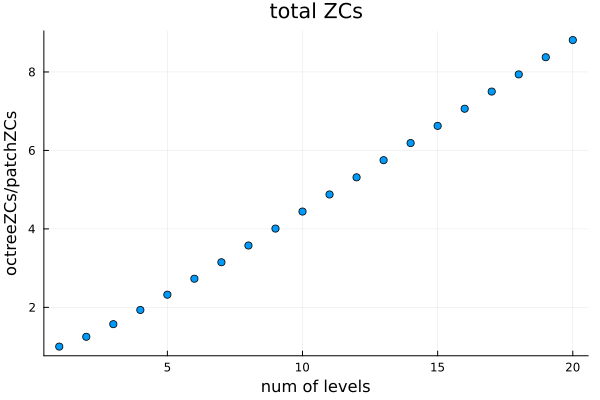

In [7]:
let plt = plot()
    levs = 1:20
    y = f_octbypatZCs.(levs)
    plt = scatter!(levs, y, label="")
    plot!(plt, xlabel = "num of levels",  ylabel = "octreeZCs/patchZCs", title = "total ZCs")
    display(plt)
end

## Compare: the number of ZCs per node required to make a full time step

For the patch-based case, since the work is distributed across nodes level by level, the ratio $r = N^3/U$ between the number of points $N^3$ on each level and the maximum number of nodes $U$ that can be used is determined by the finite difference scheme being employed.

For the octree-based case, we assume the same limit: $r=N^3 \left(1+\frac{7}{8}(L-1)\right)/U$.

In [8]:
patchUs = N^3 / r

(N^3) / r

In [9]:
octreeUs = (octreeZCs/2^(L-1)) / r

((1//8)*(1 + 7L)*(N^3)) / r

In [10]:
patchZCperU = patchZCs / patchUs

r*(-1 + 2^L)

In [11]:
octreeZCperU = octreeZCs / octreeUs

r*(2^(-1 + L))

#### compare

In [12]:
octbypatZCperU = simplify(octreeZCperU / patchZCperU)

(2^(-1 + L)) / (-1 + 2^L)

In [13]:
octbypatUs = simplify(octreeUs / patchUs, expand=true)

(1//8) + (7//8)*L

In [14]:
f_octbypatZCperU = build_function(octbypatZCperU, L, expression = Val{false})
f_octbypatUs = build_function(octbypatUs, L, expression = Val{false})

RuntimeGeneratedFunction(#=in Symbolics=#, #=using Symbolics=#, :((L,)->begin
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:385 =#
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:386 =#
          #= /Users/liwei/.julia/packages/SymbolicUtils/ij6YM/src/code.jl:387 =#
          (+)(1//8, (*)(7//8, L))
      end))

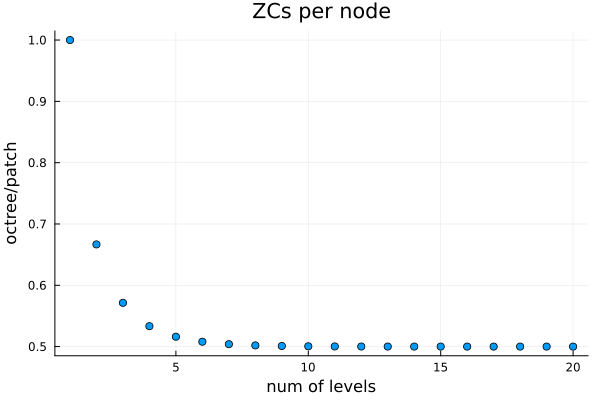

In [15]:
let plt = plot()
    levs = 1:20
    y = f_octbypatZCperU.(levs)
    plt = scatter!(levs, y, label="")
    plot!(plt, xlabel = "num of levels",  ylabel = "octree/patch", title = "ZCs per node")
    display(plt)
end

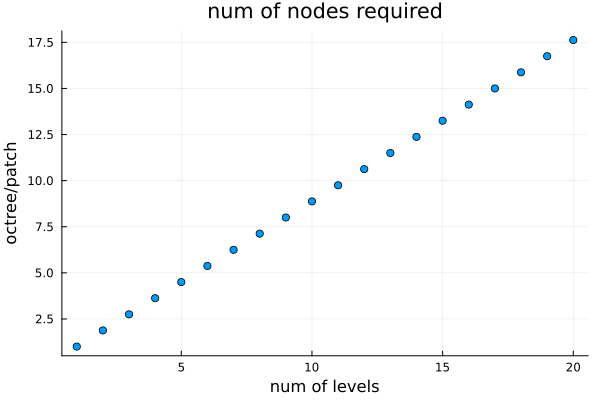

In [16]:
let plt = plot()
    levs = 1:20
    y = f_octbypatUs.(levs)
    plt = scatter!(levs, y, label="")
    plot!(plt, xlabel = "num of levels",  ylabel = "octree/patch", title = "num of nodes required")
    display(plt)
end